In [0]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras
import keras.backend as K
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

In [0]:
batch_size = 256
num_classes = 10
epochs = 10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

img_rows = 32
img_cols = 32

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


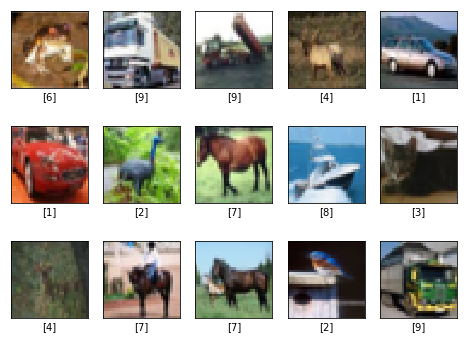

In [22]:
plt.figure(figsize=(8,6))
for i in range(15):
    plt.subplot(3, 5, i+1, xticks=[], yticks=[])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

plt.show()

In [23]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0.0 1.0
0.0 1.0


In [24]:

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Формирование модели**

In [0]:
IMG_SHAPE = (32,32,3)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=IMG_SHAPE))
model.add(Dropout(0.4))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
__________

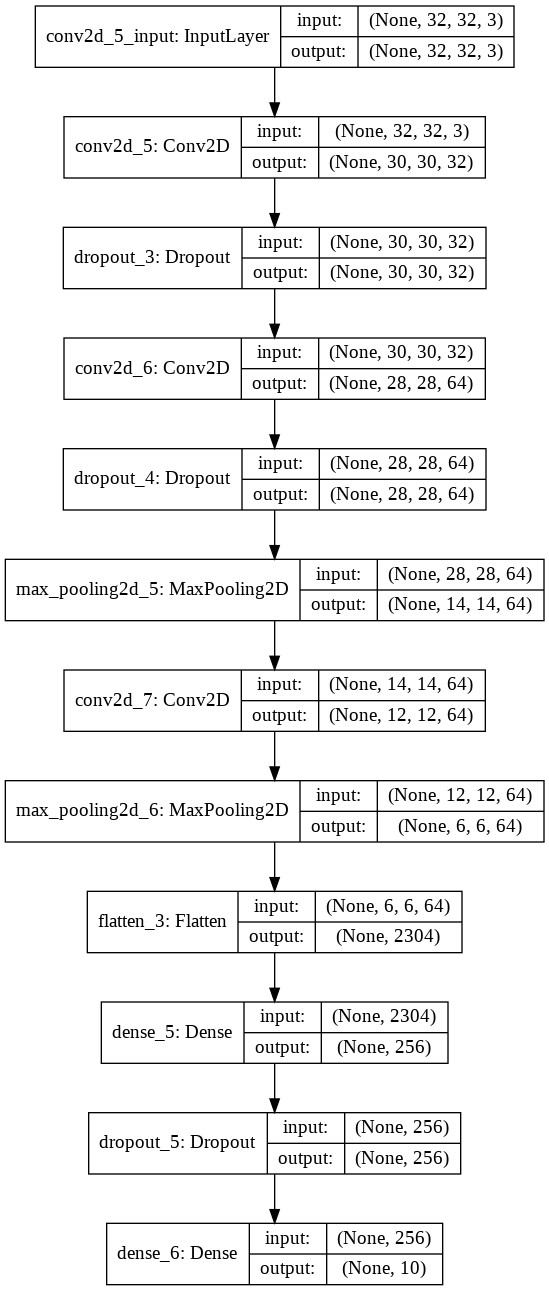

In [46]:
from IPython.display import Image
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(retina=True, filename='model.png')

In [0]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])

**Обучение**

In [49]:

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_split=0.3
                    )

score = model.evaluate(x_test, y_test, verbose=0)
print('\n\nTest loss:', score[0])
print('Test accuracy:', score[1])

Train on 35000 samples, validate on 15000 samples
Epoch 1/5
35000/35000 [==============================] - 191s 5ms/step - loss: 1.7167 - acc: 0.3739 - val_loss: 1.6154 - val_acc: 0.4733
Epoch 2/5
35000/35000 [==============================] - 191s 5ms/step - loss: 1.4736 - acc: 0.4683 - val_loss: 1.4317 - val_acc: 0.5228
Epoch 3/5
35000/35000 [==============================] - 190s 5ms/step - loss: 1.3360 - acc: 0.5214 - val_loss: 1.3290 - val_acc: 0.5621
Epoch 4/5
35000/35000 [==============================] - 190s 5ms/step - loss: 1.2277 - acc: 0.5603 - val_loss: 1.2250 - val_acc: 0.6032
Epoch 5/5
35000/35000 [==============================] - 190s 5ms/step - loss: 1.1352 - acc: 0.5981 - val_loss: 1.1458 - val_acc: 0.6319


Test loss: 1.1371341255187988
Test accuracy: 0.6301


In [0]:
def plot_history(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

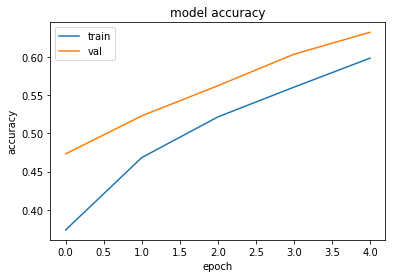

In [51]:
plot_history(history)

**Результаты**

[8]


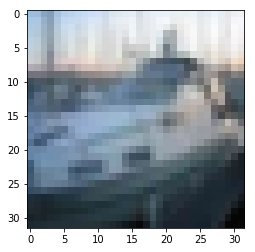

In [63]:
plt.imshow(x_test[2], cmap=plt.cm.binary)
pred_class = model.predict_classes(x_test[2].reshape(-1, 32, 32, 3))
print(pred_class)

In [64]:
model.save('cifar10_test.h5')

saved_model = keras.models.load_model('cifar10_test.h5')
pred_class = saved_model.predict_classes(x_test[2].reshape(-1, 32, 32, 3))
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(pred_class, ": ", labels[int(pred_class)])

[8] :  Ship
